# Gas Prices effecting Car Prices

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)</br>
    - 1.2 [Data source and data set](#section102)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)</br>
    - 3.2 [head](#section302)</br>
    - 3.3 [shape](#section303)</br>
    - 3.4 [sample](#section304)</br>
    - 3.5 [Pandas Pre Profiling](#section305)</br>
    - 3.6 [Initial Observations](#section306)</br>
    - 3.7 [Final Observations](#section307)</br>
    - 3.8 [Pandas Post Profiling](#section308)</br>
- 4. [Data Normalization](#section4)</br>   
    - 4.1 [Renaming the STID column to 'ID' in fuel_prices DF and mergin with gas_station DF](#section401)</br>
    - 4.2 [Converting Date to Time series object for indexing](#section402)</br>
    - 4.3 [Adding Year, Month, Week, Day of Week to DF](#section403)</br>
    - 4.5 [Subsetting BRAND and respective gasoline prices](#section404)</br>
- 5. [EDA through Questions](#section5)</br>
    - 5.1 [How many different stations exist in the data set and what is the existing history in days](#section501)</br>
    - 5.2 [What is the min, mean, max price for each gasoline type and station weekly?](#section502)</br>
    - 5.3 [What is the cheapest station __(in average)__ and why?](#section503)</br>
    - 5.4 [At which day of a week is the price most likely the cheapest __(week profile)__?](#section504)</br>
    - 5.5 [At which hour during a day is the price the cheapest in average __(hour profile)__?](#section505)</br>
    - 5.6 [How many different station locations are present in the data __(visualize via a map)__?](#section506)</br>
    - 5.7 [What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?](#section507)</br>
    - 5.8 [At which hour during a day do we have the most price changes?](#section508)</br>
    - 5.9 [Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of E10 and DIESEL](#section509)</br>
    - 5.10 [Describe a possible business potential in Euros for the customer (textual description in the ipython file). Define the constraints of the business case 5 lines, the answer max 15 lines __(high level summary)__](#section510)</br>

<a id=section1></a>
## 1. Problem Statement

Would knowing the gas prices in real time add any value to the company dealing with a fleet of cars, especially in their maintenance services

<a id=section101></a>
### 1.1 Introduction
The OLAT System provides an extraction of data of gasoline prices in Germnay. The prices are real time and are available for analysis. We would like to know whether these prices hold any relevance in prices of cars.

<a id=section102></a>
### 1.2 Data Source and dataset
__a__. Source of Data

- __Name__: "Tanker Konig"
- __API Endpoint__: https://creativecommons.tankerkoenig.de/

<a id=section2></a>
## 2. Load the packages and data

In [1]:
import sys
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline
sns.set()

gas_station = pd.read_csv("example_sprit_cut_station.csv", delimiter=';')
fuel_prices = pd.read_csv("example_sprit_cut_prices.csv", delimiter=";")


<a id=section3></a>
### 3. Data Profiling

Let's first review what data types our variables are?</br>
Do we need to transform any variable with respect to standards before we start analysis?

<a id=section301></a>

In [2]:
gas_station.dtypes

ID                            object
VERSION                        int64
VERSION_TIME                  object
NAME                          object
BRAND                         object
STREET                        object
HOUSE_NUMBER                  object
POST_CODE                     object
PLACE                         object
PUBLIC_HOLIDAY_IDENTIFIER     object
LAT                          float64
LNG                          float64
dtype: object

<a id=section302></a>

In [3]:
fuel_prices.dtypes

STID            object
E5               int64
E10              int64
DIESEL           int64
DATE_CHANGED    object
CHANGED          int64
dtype: object

In [4]:
gas_station.head(2)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691


<a id=section303></a>

In [5]:
fuel_prices.head(2)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21


In [6]:
gas_station.shape

(824, 12)

<a id=section304></a>

In [7]:
fuel_prices.shape

(2189526, 6)

In [8]:
gas_station.sample(5)

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
750,e5719fb8-559a-402c-95b6-25a5f74eb24b,1,2013-08-07 02:01:16.000000,Total LEMBERG,Total,PIRMASENSER STR.,26,66969,LEMBERG,\N,49.173510,7.653735
461,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,1,2013-07-31 22:00:00.000000,NEUSTADT LANDAUERSTR,Shell,LANDAUERSTR. 121,NaN,67434,Neustadt,\N,49.344600,8.152980
576,c691499f-69da-436c-b154-282030f77692,1,2013-07-31 22:00:00.000000,KAISERSLAUTERN MERKURSTR. 2.,Shell,MERKURSTR. 20,NaN,67663,Kaiserslautern,\N,49.443200,7.726810
782,b12bf789-1d71-435e-85f5-99852fa6722d,2,2013-08-02 03:44:20.000000,Aral Tankstelle,ARAL,Hauptstraße,10,67697,Otterberg,\N,49.499206,7.772772
625,8c5dbc74-f033-4a18-ab3b-bda2bcbdd921,1,2013-08-07 02:01:16.000000,Total KIRCHHEIM,Total,AUTOHOF ROSENGARTENWEG,1,67281,KIRCHHEIM,\N,49.558613,8.187500


In [9]:
fuel_prices.sample(5)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
1705302,22164fef-8f55-4c6e-9051-9e6bfc32c535,1669,1629,1469,2014-06-09 14:02:01.000000,21
1607443,260323f2-06e8-41ab-aaea-b62bbc160a37,1629,1589,1429,2014-06-17 07:58:01.000000,20
917508,2d9f96ce-bb12-4612-8848-1166331b81bb,1599,1579,1369,2015-05-06 07:26:01.000000,21
935705,0f2e0c50-51c1-4a4f-bfdb-c6f2eb676893,1689,1649,1469,2014-07-10 14:02:01.000000,21
1169712,a464ab05-8e0e-4ff3-be09-7bea685845c4,1539,1499,1359,2014-08-22 13:46:01.000000,1


<a id=section305></a>

In [10]:
gas_station_pre_profile = pandas_profiling.ProfileReport(gas_station)
gas_station_pre_profile.to_file(outputfile='gas_station_before_profiling.html')

fuel_prices_pre_profile = pandas_profiling.ProfileReport(fuel_prices)
fuel_prices_pre_profile.to_file(outputfile='fuel_prices_before_profiling.html')

<a id=section306></a>
### 3.6 Initial Observations

#### gas_station _DataFrame_
- __ID__ column has __412__ unique values. Also __each ID__ has a _frequency_ of __2__, meaning there are _duplicates_ that need to be removed based on this column only.</br>
- __BRAND__ column is categorical with a distinct count of __56__. Hence total __56__ brands</br>
- __NAME__ column is categorical with a distinct count of __295__. Hence total __295__ units.</br>

#### fuel_prices _DataFrame_
- __E10__ column is highly correlated with __E5__. 
- __STID__ has a high cardinality with __412__ distinct values. 
- Entire dataset has __1094763__ duplicates. We need to clean this primarily

#### _Removing Duplicates from_ gas_station _DataFrame_

In [11]:
gas_station = gas_station.drop_duplicates()
print('The shape of the data set is: {0}'.format(gas_station.shape))
print('Total no. of entries in dataset after removing duplicates are: {0}'.format(gas_station['ID'].nunique()))

The shape of the data set is: (412, 12)
Total no. of entries in dataset after removing duplicates are: 412


#### _Removing Duplicates from_ fuel_prices _DataFrame_

In [12]:
fuel_prices = fuel_prices.drop_duplicates()
print('The shape of the data set is: {0}'.format(fuel_prices.shape))
print('Total no. of entries in dataset after removing duplicates are:\n{0}'.format(fuel_prices.count()))

The shape of the data set is: (1094763, 6)
Total no. of entries in dataset after removing duplicates are:
STID            1094763
E5              1094763
E10             1094763
DIESEL          1094763
DATE_CHANGED    1094763
CHANGED         1094763
dtype: int64


#### _Removing rows with 0 values in price  from_ fuel_prices _DataFrame_

#### _Removing columns from_ gas_station _DataFrame_

In [13]:
gas_station.groupby('PUBLIC_HOLIDAY_IDENTIFIER').size()

PUBLIC_HOLIDAY_IDENTIFIER
\N      358
deBW      9
deBY     10
deHE      3
deRP     32
dtype: int64

In [14]:
gas_station.shape

(412, 12)

In [15]:
# Removing 'VERSION' ,'VERSION_TIME' ,'PUBLIC_HOLIDAY_IDENTIFIER'& 'HOUSE_NUMBER'columns
gas_station= gas_station.drop(['VERSION', 'VERSION_TIME','PUBLIC_HOLIDAY_IDENTIFIER', 'HOUSE_NUMBER'], axis=1)





In [16]:
gas_station.head()

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,68169,MANNHEIM,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,Aral Tankstelle,ARAL,Trippstadter Straße,67663,Kaiserslautern,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,67655,KAISERSLAUTERN,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,76726,GERMERSHEIM,49.226800,8.374400


#### _Checking_ NaN _values and removing them from_ gas_station _DataFrame_

In [17]:
gas_station.isna().sum()

ID            0
NAME          0
BRAND        11
STREET        2
POST_CODE     2
PLACE         2
LAT           0
LNG           0
dtype: int64

In [18]:
gas_station = gas_station.dropna()
print('The shape is: {0}'.format(gas_station.shape))
gas_station.isna().sum()

The shape is: (399, 8)


ID           0
NAME         0
BRAND        0
STREET       0
POST_CODE    0
PLACE        0
LAT          0
LNG          0
dtype: int64

#### _Checking_ NaN _values and removing them from_ fuel_prices _DataFrame_

In [19]:
fuel_prices.isna().sum()

STID            0
E5              0
E10             0
DIESEL          0
DATE_CHANGED    0
CHANGED         0
dtype: int64

#### _Fixing_ BRAND _column of_ gas_station _DataFrame_

In [20]:
print('Total number of unique brands is: {0}'.format(gas_station.BRAND.nunique()))

Total number of unique brands is: 53


In [21]:
gas_station.groupby('BRAND').size()

BRAND
ARAL                                    75
AVIA                                    33
Agip                                    17
BFT                                     19
Bft                                      1
CLASSIC                                  1
E Center                                 1
ED                                       4
ELAN                                     1
ESSO                                    36
Eberhardt Jöhlingen                      1
Freie                                    4
Freie Tankstelle                         3
Fritz Walter GmbH                        1
Frühmesser GmbH                          6
HEM                                      5
JET                                     25
Markant                                  1
Markenfreie TS                           1
Mr. Wash Autoservice AG                  1
OIL!                                     6
OMV                                     10
Preis                                    2
Raiff

In [22]:
titleCase = lambda x: x.upper()
gas_station['BRAND'] = gas_station['BRAND'].apply(titleCase)
gas_station.groupby('BRAND').size()

BRAND
AGIP                                    17
ARAL                                    75
AVIA                                    33
BFT                                     25
CLASSIC                                  1
E CENTER                                 1
EBERHARDT JÖHLINGEN                      1
ED                                       4
ELAN                                     1
ESSO                                    36
FREI                                     1
FREIE                                    4
FREIE TANKSTELLE                         5
FRITZ WALTER GMBH                        1
FRÜHMESSER GMBH                          6
HEM                                      5
JET                                     25
MARKANT                                  1
MARKENFREIE TS                           1
MR. WASH AUTOSERVICE AG                  1
MTB                                      1
NICHT MEHR AKTIV                         1
OIL!                                     6
OMV  

In [23]:
print(gas_station.BRAND.unique())

['ARAL' 'JET' 'SUPERMARKT-TANKSTELLE AM REAL- MARKT' 'TANKHOF IFFEZHEIM'
 'SCHIFFER & NICKLAUS GMBH' 'SEFRIN HEIZÖL & KRAFTSTOFFE' 'BFT' 'MARKANT'
 'AVIA' 'NICHT MEHR AKTIV' 'FREIE TANKSTELLE' 'HEM' 'FRITZ WALTER GMBH'
 'TAMOIL' 'FREIE' 'RNT' '\\N' 'SCHUSTER & SOHN KG' 'RAIFFEISEN' 'E CENTER'
 'EBERHARDT JÖHLINGEN' 'AGIP' 'WINKLER' 'MR. WASH AUTOSERVICE AG' 'ESSO'
 'ZG RAIFFEISEN ENERGIE' 'SUPERMARKT-TANKSTELLE' 'CLASSIC' 'SHELL'
 'SUPERMARKT TANKSTELLE' 'RAIFFEISEN TANKSTELLE' 'PREIS' 'MTB'
 'TANKCENTER' 'TS ARNT' 'FREI' 'OMV' 'FRÜHMESSER GMBH' 'OIL!' 'SB MARKT'
 'SB' 'TOTAL' 'ED' 'SB-MARKTTANKSTELLE' 'MARKENFREIE TS' 'TOP' 'T' 'ELAN'
 'TANKSTELLE HEINZ']


In [24]:
# define  afunction to change 'FREIE TANKSTELLE','FREIE','FREI' to 'FREIE'

<a id=section308></a>

In [25]:
post_profile_gas_station = pandas_profiling.ProfileReport(gas_station)
post_profile_gas_station.to_file('post_profiling_gas_station.html')

post_profile_fuel_prices = pandas_profiling.ProfileReport(fuel_prices)
post_profile_fuel_prices.to_file('post_profiling_fuel_prices.html')

<a id=section400></a>

<a id=section4></a>
## 4. Data Normalization

<a id=section401></a>

In [26]:
# Renaming the STID column to 'ID' in fuel_prices DF and mergin with gas_station DF
fuel_prices.rename(columns={'STID': 'ID'}, inplace=True)
gas_station_fuel_prices = pd.merge(gas_station, fuel_prices, on='ID', how='inner')



In [37]:
print('Total no. of entries in dataset before removing rows with 0 as price value are:\n{0}'.format(gas_station_fuel_prices.count()))

Total no. of entries in dataset before removing rows with 0 as price value are:
ID           1061640
NAME         1061640
BRAND        1061640
STREET       1061640
POST_CODE    1061640
PLACE        1061640
LAT          1061640
LNG          1061640
E5           1061640
E10          1061640
DIESEL       1061640
CHANGED      1061640
Year         1061640
Month        1061640
Week         1061640
Day          1061640
dtype: int64


In [42]:
gas_station_fuel_prices=gas_station_fuel_prices[(gas_station_fuel_prices !=0]
print('The shape of the data set is: {0}'.format(gas_station_fuel_prices.shape))
print('Total no. of entries in dataset after removing rows with 0 as price value are:\n{0}'.format(gas_station_fuel_prices.count()))

SyntaxError: invalid syntax (<ipython-input-42-f139a4ad40c6>, line 1)

In [ ]:
indexNames = gas_station_fuel_prices[gas_station_fuel_prices]['E5']==0].index
gas_station_fuel_prices.drop(indexNames,inplace=True)

In [30]:
gas_station_fuel_prices.count()

ID              1061640
NAME            1061640
BRAND           1061640
STREET          1061640
POST_CODE       1061640
PLACE           1061640
LAT             1061640
LNG             1061640
E5              1061640
E10             1061640
DIESEL          1061640
DATE_CHANGED    1061640
CHANGED         1061640
dtype: int64

<a id=section402></a>

In [31]:
# Converting the DATE_CHANGED column type from generic object type to datetime type to suit Time Series Analysis
gas_station_fuel_prices['DATE_CHANGED'] = pd.to_datetime(gas_station_fuel_prices['DATE_CHANGED'])

# Resetting the index of DataFrame with DATE_CHANGED column to enable time-stamp based indexing
gas_station_fuel_prices = gas_station_fuel_prices.set_index('DATE_CHANGED')

gas_station_fuel_prices.head()

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,,,,
2014-12-14 16:30:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1369,1329,1219,63
2014-12-14 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1409,1369,1269,21
2014-12-15 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1409,1369,1269,21
2014-12-16 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1399,1359,1259,21
2014-12-17 05:06:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1379,1339,1239,21


<a id=section403></a>

In [32]:
# Adding Year, Month, Week, Day
gas_station_fuel_prices['Year'] = gas_station_fuel_prices.index.year
gas_station_fuel_prices['Month'] = gas_station_fuel_prices.index.month
gas_station_fuel_prices['Week'] = gas_station_fuel_prices.index.week
gas_station_fuel_prices['Day'] = gas_station_fuel_prices.index.weekday_name

# Sample 
gas_station_fuel_prices.sample(5, random_state=0)

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG,E5,E10,DIESEL,CHANGED,Year,Month,Week,Day
DATE_CHANGED,,,,,,,,,,,,,,,,
2015-09-16 23:06:01,e50f3cfa-f32b-48e7-8304-a9f3d40d9996,AVIA Servicestation,AVIA,Oestliche Rheinbrückenstraße,76187,Karlsruhe-Knielingen,49.029480,8.342968,1409,1389,1189,21,2015,9,38,Wednesday
2015-03-18 15:38:01,51d4b5b9-a095-1aa0-e100-80009459e03a,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,67098,BAD DUERKHEIM,49.464100,8.177850,1359,1339,1159,20,2015,3,12,Wednesday
2015-08-31 09:38:01,fe9954a8-3042-46ef-bed8-63d753aeb9e8,Aral Tankstelle,ARAL,Sezanner Straße,76316,Malsch,48.889465,8.326925,1339,1319,1089,21,2015,8,36,Monday
2014-06-23 09:22:01,51d4b432-a095-1aa0-e100-80009459e03a,JET KARLSRUHE KILLISFELDSTR. 32,JET,KILLISFELDSTR. 32,76227,KARLSRUHE,48.997040,8.456450,1529,1489,1319,21,2014,6,26,Monday
2015-04-04 06:02:01,f5552423-47e5-4290-bce2-5625bb6c8a69,Esso Tankstelle,ESSO,DONNERSBERGSTR. 13,67677,ENKENBACH-ALSENBORN,49.489321,7.897673,1399,1379,1169,21,2015,4,14,Saturday


<a id=section404></a>

In [33]:
# Subsetting brand and their respective gas type prices only
brand_prices = gas_station_fuel_prices[['BRAND','E5', 'E10', 'DIESEL']]
brand_prices.head()

,BRAND,E5,E10,DIESEL
DATE_CHANGED,,,,
2014-12-14 16:30:01,ARAL,1369,1329,1219
2014-12-14 20:02:01,ARAL,1409,1369,1269
2014-12-15 20:02:01,ARAL,1409,1369,1269
2014-12-16 20:02:01,ARAL,1399,1359,1259
2014-12-17 05:06:01,ARAL,1379,1339,1239


<a id=section5></a>
## 5. EDA through Questions

<a id=section501></a>

#### 1. How many different stations exist in the data set and what is the existing history in days?

In [35]:
##  Number of  stations in original  Dataset are 412 ,Number of stations after removing brands with nan and NICHT MEHR AKTIV  
print('The number of different stations in data set is: {0}'.format(gas_station_fuel_prices.ID.nunique()))


The number of different stations in data set is: 398


<a id=section502></a>

#### 2. What is the min, mean, max price for each gasoline type and station weekly?

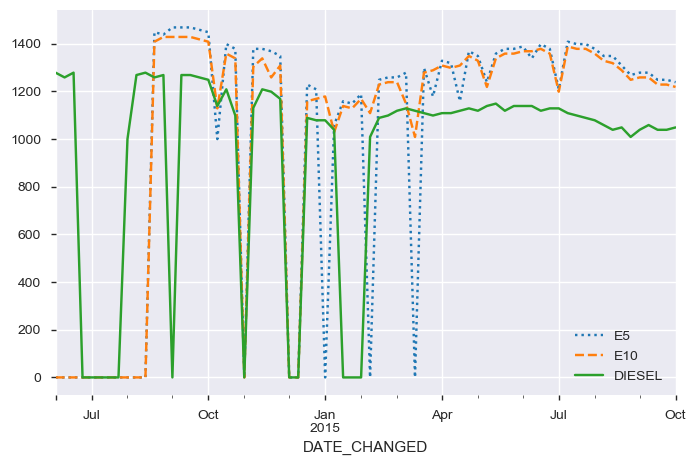

In [36]:
# Weekly Minimum Price of Each Gasoline Type:
weekly_min = brand_prices.resample('W').min()
weekly_min.plot(figsize=(8,5), style=[':', '--', '-'])

_The min prices of gassoline types are:_ <br>
a. __E5__ : __1500 (approx)__ <br>
b. __E10__ : __0__ <br>
c. __DIESEL__ : __1250 (approx)__ <br>

In [ ]:
# Weekly Mean Price of Each Gasoline Type:
weekly_mean = brand_prices.resample('W').mean()
weekly_mean.plot(figsize=(8,5), style=[':', '--', '-'])

_The mean prices of gasoline types are:_ <br>
a. __E5__ : __1610 (approx)__ <br>
b. __E10__ : __1540 (aprox)__ <br>
c. __DIESEL__ : __1400 (approx)__ <br>

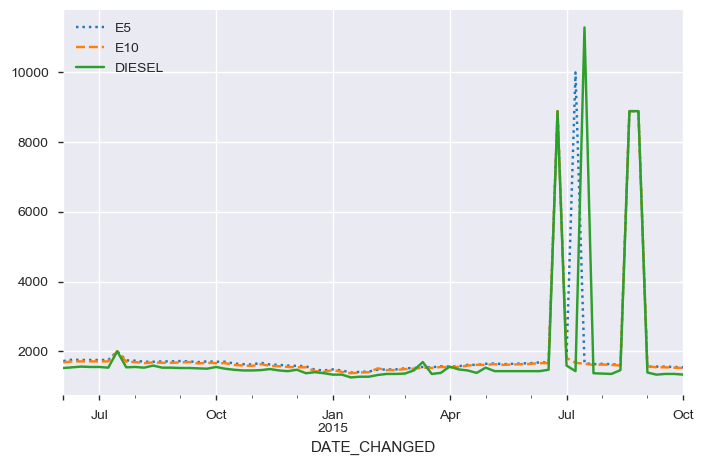

In [45]:
# Weekly Maximum Price of Each Gasoline Type:
weekly_max = brand_prices.resample('W').max()
weekly_max.plot(figsize=(8,5), style=[':', '--', '-'])

_The maximum prices of gasoline types are:_ <br>
a. __E5__ : __10000 (approx)__<br>
b. __E10__ : __1900 (approx)__<br>
c. __DIESEL__ : __11000 (approx)__ <br>

<a id=section503></a>

#### 3. What is the cheapest station (in average) and why?

In [46]:
#gas_station_fuel_prices.groupby('BRAND').size()

gas_station_fuel_prices.head()

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG,E5,E10,DIESEL,CHANGED,Year,Month,Week,Day
DATE_CHANGED,,,,,,,,,,,,,,,,
2014-12-14 16:30:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1369,1329,1219,63,2014,12,50,Sunday
2014-12-14 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1409,1369,1269,21,2014,12,50,Sunday
2014-12-15 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1409,1369,1269,21,2014,12,51,Monday
2014-12-16 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1399,1359,1259,21,2014,12,51,Tuesday
2014-12-17 05:06:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,ARAL,An der Tagweide,76139,Karlsruhe,49.02028,8.459429,1379,1339,1239,21,2014,12,51,Wednesday


<a id=section504></a>

#### 4. At which day of a week is the price most likely the cheapest (week profile)?

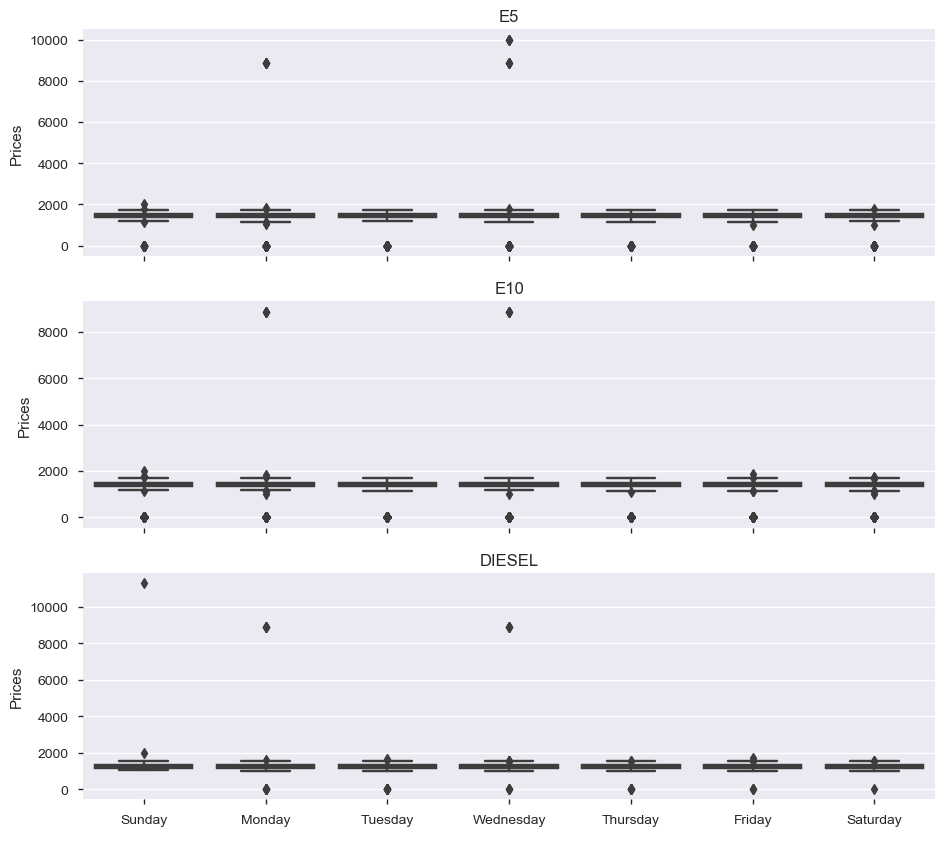

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['E5', 'E10', 'DIESEL'], axes):
    sns.boxplot(data=gas_station_fuel_prices, x='Day', y=name, ax=ax)
    ax.set_ylabel('Prices')
    ax.set_xlabel(' ')
    ax.set_title(name)

_The price is cheapest for below gas types on days:_ <br>
a. __E5__ : __Tuesday__ <br>
b. __E10__ : __Tuesday__ <br>
c. __DIESEL__ : __Thursday__ <br>

<a id=section505></a>

#### 5. At which hour during a day is the price the cheapest in average (hour profile)?

(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 <a list of 24 Text xticklabel objects>)

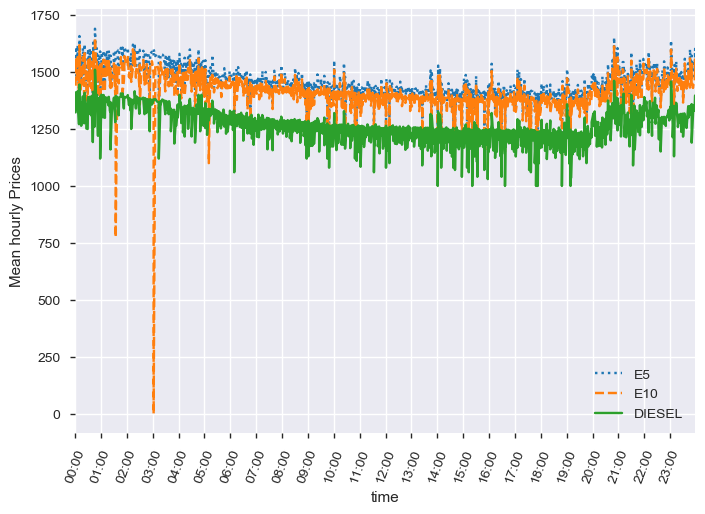

In [48]:
hourly_prices = brand_prices.groupby(brand_prices.index.time).mean()
hourly = 1 * 60 * 60 * np.arange(24)
hourly_prices.plot(xticks=hourly, style=[':', '--', '-']);
plt.ylabel('Mean hourly Prices')
plt.xticks(rotation=70)

_As we can see from above that the cheapest price of a fuel during a day is_:<br> 
 a. __05:45 am__ _in the morning for_ __E5__ _gas_ <br>
 b. __03:00 am__ _in the morning for_ __E10__ _gas_ <br>
 c. __14:00 pm__ _in the afternoon for_ __DIESEL__ 

<a id=section506></a>

#### 6. How many different station locations are present in the data (visualize via a map)?

In [49]:
print('The unique number of Postal Codes are: {0}'.format(gas_station_fuel_prices.POST_CODE.nunique()))
      

The unique number of Postal Codes are: 174


<a id=section507></a>

#### 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?

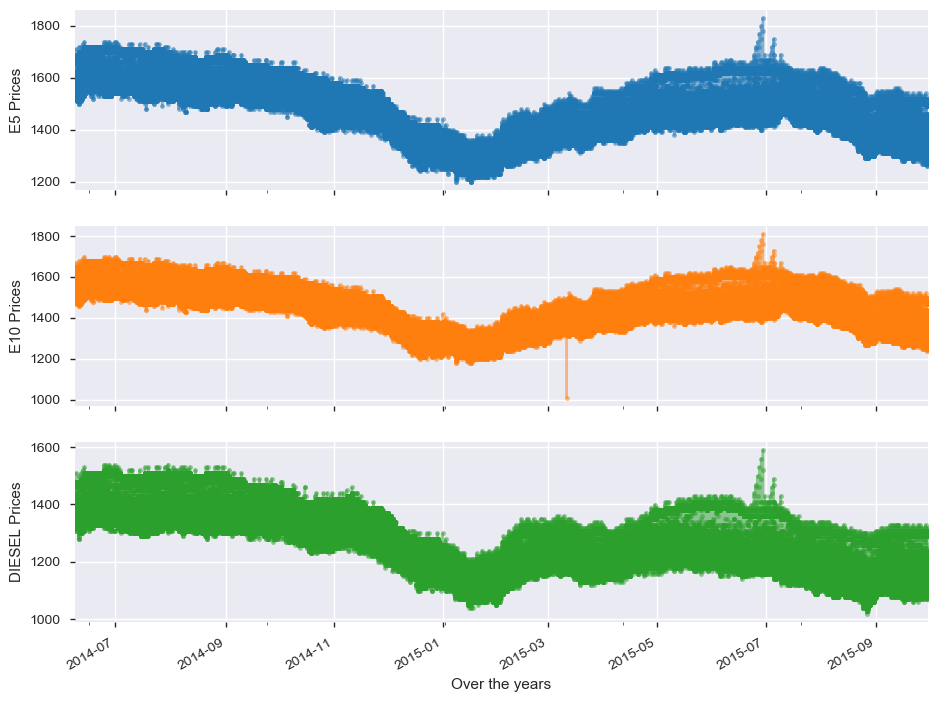

In [50]:
# Aral is the gas station which has got the most price data points
aral_gas_station = gas_station_fuel_prices.loc[gas_station_fuel_prices['BRAND'] == 'ARAL']

# Selecting the different types of Gas
gas_types = ['E5', 'E10', 'DIESEL']

# Plotting time series for 3 gasoline types
axes = aral_gas_station[gas_types].plot(marker='.', alpha=0.5, figsize=(11, 9), subplots=True, 
                                               legend=False
                                              )
for fuel, ax in zip(gas_types, axes):
    ax.set_ylabel(fuel + ' Prices')
    ax.set_xlabel('Over the years')
    

<a id=section508></a>

#### 8. At which hour during a day do we have the most price changes?

_From the graph above, it is evident that the most price changes in a day have occured at:_ __03:00__ am _in the morning_

<a id=section509></a>

#### 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of E10 and DIESEL

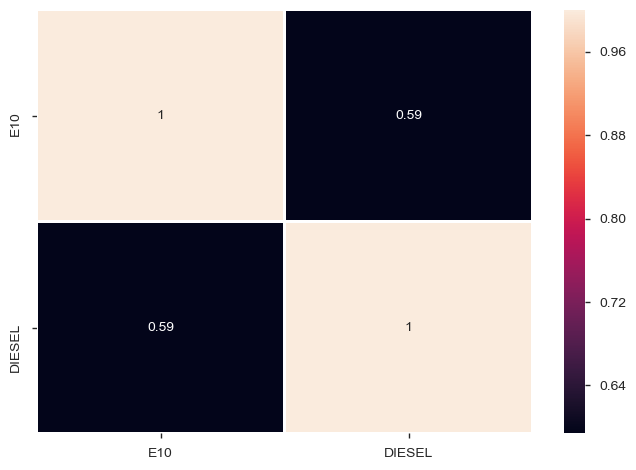

In [51]:
# Considering prices between 12:00 and 13:00
prices_time_interval = gas_station_fuel_prices.between_time('12:00', '13:00')
prices_time_interval = prices_time_interval.loc[:,['BRAND', 'E10', 'DIESEL']]

# Grouping by BRAND to get the top 20 for the longest time history
top_20_gas_stations_data = gas_station_fuel_prices.groupby(['BRAND']).size().sort_values(ascending=False).head(20)
top_20_gas_stations_name = top_20_gas_stations_data.index
prices_time_interval = prices_time_interval.loc[prices_time_interval['BRAND'].isin(top_20_gas_stations_name)]

# Drawing the heatmap:
sns.heatmap(prices_time_interval.corr(), annot=True, linewidths=1)

<a id=section510></a>

#### 10. Describe a possible business potential in Euros for the customer (textual description in the ipython file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

In [53]:
map_df = gpd.read_file(germanymap.shp)

NameError: name 'germanymap' is not defined